In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix

Funkcja losująca wartości z dwóch rozkładów normalnych i tworząca z nich jedną ramkę danych.

In [187]:
def draw_data_gauss(S1, S2, m1, m2, n1, n2):
    X1 = np.random.multivariate_normal(m1, S1, n1) #losowanie obserwacji w klasach na podstawie wcześniejszych parametrów
    X2 = np.random.multivariate_normal(m2, S2, n2)
    
    X1_data = pd.DataFrame(X1, columns = ["x", "y"])
    X1_data["class"] = [1] * len(X1)
    X2_data = pd.DataFrame(X2, columns = ["x", "y"])
    X2_data["class"] = [2] * len(X2)
    XX = X1_data.append(X2_data, sort = False)
    return XX

Parametry rozkładów i tworzenie ramki danych

In [188]:
d = {'x':[4,2],'y':[2,4]}
S1 = pd.DataFrame(d)    #macierz kowariancji
S2 = pd.DataFrame(d)    
m1 = np.array([-1,-1]) #średnie klas
m2 = np.array([2,2])
n1 = 30                #liczebność klas
n2 = 20
n = n1+n2
X = draw_data_gauss(S1, S2, m1, m2, n1, n2)

Tablice, które będą trzymały wartości z macierzy pomyłek dla powtórnego podstawienia

In [189]:
accuracy = np.zeros(21)
tp = np.zeros(21)
tn = np.zeros(21)

Wyznaczanie parametrów macierzy pomyłek dla metody k-nn, gdzie k<1,21>

In [190]:
for i in range(21):
    knn_discriminant = knn(n_neighbors=i+1)
    knn_pred = knn_discriminant.fit(X[X.columns[:2]], X["class"]).predict(X[X.columns[:2]])
    tn[i], fp, fn, tp[i] = confusion_matrix(X["class"],knn_pred).ravel()
    accuracy[i] = knn_discriminant.score(X[X.columns[:2]],X["class"])

Sklejenie tablic z parametrami w ramkę danych

In [191]:
data = pd.DataFrame(np.array([accuracy, tp, tn, range(1,22)]).T, columns = ["acc", "tp", "tn", "k"])

Tablice, które będą trzymały wartości z macierzy pomyłek dla grupy testowej

In [195]:
accuracy_test = np.zeros(21)
tp_test = np.zeros(21)
tn_test = np.zeros(21)
l = 10    #liczba prób

Losowanie podgrupy testowej i wyznaczanie parametrów macierzy pomyłek dla metody k-nn, gdzie k<1,21>

In [196]:
for j in range(l):
    X1 = X[:n1].sample(10)
    X2 = X[n1:n1+n2].sample(5)
    XX = X1.append(X2, sort = False)
    for i in range(21):
        knn_discriminant = knn(n_neighbors=i+1)
        knn_pred = knn_discriminant.fit(X[X.columns[:2]], X["class"]).predict(XX[XX.columns[:2]])
        tn_t, fp, fn, tp_t = confusion_matrix(XX["class"],knn_pred).ravel()
        tp_test[i] = tp_test[i] + tp_t
        tn_test[i] = tn_test[i] + tn_t
        accuracy_test[i] = accuracy_test[i] + knn_discriminant.score(XX[XX.columns[:2]],XX["class"])

Uśrednianie wartości po liczbie prób

In [197]:
acc_mean = accuracy_test/l
tp_mean = tp_test/l
tn_mean = tn_test/l
data_mean = pd.DataFrame(np.array([acc_mean, tp_mean, tn_mean, range(1,22)]).T, columns = ["acc", "tp", "tn", "k"])

Rysowanie wykresów porównujących wyznaczone parametry w przypadku powtórnego podstawienia (Train) i losowania podgrup (Test)

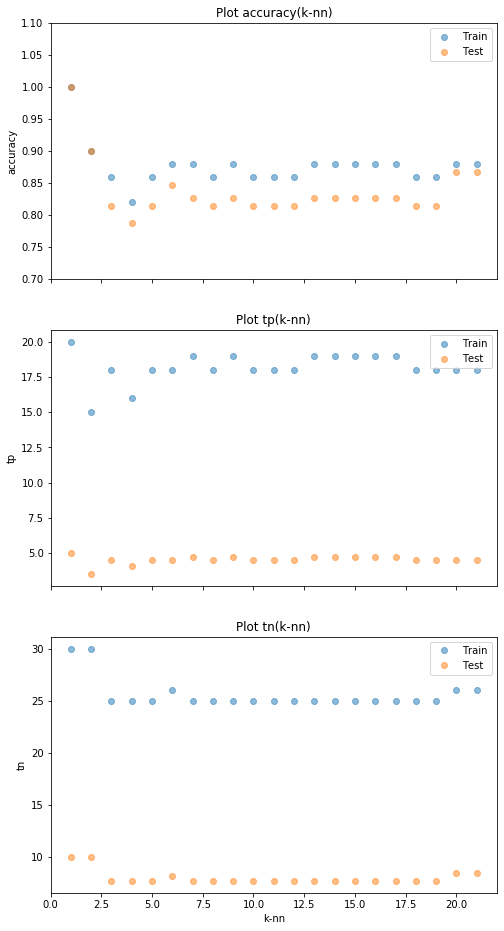

In [198]:
fig, axs = plt.subplots(3, 1,sharex = "col", gridspec_kw = {"hspace": 0.2}, figsize = [8, 16])
axs[0].plot(data["k"], data["acc"], 'o', label = "Train", alpha = 0.5)
axs[1].plot(data["k"], data["tp"], 'o', label = "Train", alpha = 0.5)
axs[2].plot(data["k"], data["tn"], 'o', label = "Train", alpha = 0.5)
axs[0].plot(data_mean["k"], data_mean["acc"], 'o', label = "Test", alpha = 0.5)
axs[1].plot(data_mean["k"], data_mean["tp"], 'o', label = "Test", alpha = 0.5)
axs[2].plot(data_mean["k"], data_mean["tn"], 'o', label = "Test", alpha = 0.5)
axs[0].set_ylim(0.7,1.1)
axs[0].set_title("Plot accuracy(k-nn)")
axs[1].set_title("Plot tp(k-nn)")
axs[2].set_title("Plot tn(k-nn)")
axs[2].set_xlabel("k-nn")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("tp")
axs[2].set_ylabel("tn")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show(fig)